# Assignment 1
---
## Cross entropy
Cross entropy is used in machine learning as a loss function. It is a measure from information theory, building upon entropy and generally calculating the difference between two probability distributions. 

For binary classification the cross entropy loss function is $-(y \log(p) + (1-y)\log(1-p))$

For multiclass classfication, the cross entropy loss function is 
$$ - \sum_{c=1}^M y_{o,c}\log(p_{o,c})$$

This cross entropy provides an estimation on how bad the classifer is that we are training. The objective is to minimize the loss function in the training process, so it is very important to deep learning.

## Optimizers
### a. SGD (Stochastic Gradient Descent)
Only a subset of training data are sampled randomly for each iteration instead of using the complete data. The reason for doing this is because:
- dataset redundancy
- require less compuation effort

SGD process:
- sample a minibatch of $m$ examples from training set $\{x^{(1)},...,x^{(m)}\}$ with labels $y^{(i)}$
- compute gradient estimate: $\hat{g} \leftarrow + \frac{1}{m}\nabla_{\theta}\sum_i L(f(x^{(i)};\theta),y^{(i)})$
- apply update: $\theta \leftarrow \theta - \epsilon \hat{g}$

It is very popular optimization strategy, however due to the constant learning rate, learning with it can sometimes be slow.

### b. RMSprop (Root Mean Square Prop)
Root Mean Square Prop (RMSProp) works by keeping an exponentially weighted average of the squares of past gradients. RMSProp then divides the learning rate by this average to speed up convergence.

RMSprop process:
- sample a minibatch of $m$ examples from training set $\{x^{(1)},...,x^{(m)}\}$ with labels $y^{(i)}$
- compute gradient estimate: $g \leftarrow + \frac{1}{m}\nabla_{\theta}\sum_i L(f(x^{(i)};\theta),y^{(i)})$
- accumulate squaredd gradient: $r \leftarrow \rho r + (1-\rho)g \odot g$ ($\odot$ is tensor product)
- compute update: $\Delta\theta = - \frac{\epsilon}{\delta + \sqrt{r}} \odot g$
- apply update: $\theta \leftarrow \theta + \Delta\theta$

Compare to AdaGrad, the use of the moving average introduce a new hyperparameter $\rho$ that control the length scale of the moving average.

Empirically, RMSProp has been shown effective for practical deep neural networks.

### c. Adam
Adaptive Moment Estimation (Adam) computes adaptive learning rates for each parameter. It is generally regarded as being fairly robust to the choice of hyperparameters.

Adam process:
- sample a minibatch of $m$ examples from training set $\{x^{(1)},...,x^{(m)}\}$ with labels $y^{(i)}$
- compute gradient estimate: $g \leftarrow + \frac{1}{m}\nabla_{\theta}\sum_i L(f(x^{(i)};\theta),y^{(i)})$
- $t \leftarrow t + 1$
- update biased first moment estimate: $s \leftarrow \rho_1 s + (1-\rho_1)g$ 
- update biased second moment estimate: $r \leftarrow \rho_2 r + (1-\rho)g \odot g$ 
- correct bias in first moment: $\hat{s} \leftarrow \frac{s}{1-\rho_1^t}$
- correct bias in second moment: $\hat{r} \leftarrow \frac{r}{1-\rho_2^t}$
- compute update: $\Delta\theta = - \epsilon\frac{\hat{s}}{\delta + \sqrt{\hat{r}}}$
- apply update: $\theta \leftarrow \theta + \Delta\theta$

Link to reference paper [Adam, AdaMax](https://arxiv.org/pdf/1412.6980.pdf)

### d. Adadelta
Adadelta optimization is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:
- The continual decay of learning rates throughout training
- The need for a manually selected global learning rate

Adadelta process:
- for $t=1:T$ do
- compute gradient: $g_t$
- accumulate gradient: $E[g^2]_t = \rho E[g^2]_{t-1} + (1-\rho)g_t^2$
- compute update: $\Delta x_t = - \frac{RMS[\Delta x]_{t-1}}{RMS[g]_t}g_t$
- accumulate updates: $ E[\Delta x^2]_t = \rho E[\Delta x^2]_{t-1} + (1-\rho)\Delta x_t^2$
- apply update: $x_{t+1} = x_t + \Delta x_t$

Link to the reference paper [AdaDelta](https://arxiv.org/pdf/1212.5701.pdf)

### e. Adagrad
The Adagrad algorithm, individually adapts the learning rates of all model parameters by scaling them inversely proportional to the square root of the sum of all of their historical squared values. The parameters with lagre partial derivative of the loss have rapid decrease in their learning rate. It is designed to converge rapidlly when applied to a convex function.

AdaGrad process:
- sample a minibatch of $m$ examples from training set $\{x^{(1)},...,x^{(m)}\}$ with labels $y^{(i)}$
- compute gradient estimate: $g \leftarrow + \frac{1}{m}\nabla_{\theta}\sum_i L(f(x^{(i)};\theta),y^{(i)})$
- accumulate squaredd gradient: $r \leftarrow r + g \odot g$ ($\odot$ is tensor product)
- compute update: $\Delta\theta \leftarrow - \frac{\epsilon}{\delta + \sqrt{r}} \odot g$
- apply update: $\theta \leftarrow \theta + \Delta\theta$

It has been found that the acculmulation of squared gradients from the beginning of the training can result in a premature and excessive decrease in the effective learning rate. This algorithm performs well only for some deep learning models.

### f. Adamax
AdaMax is a variant of Adam based on infinty norm. 

Adam process:
- sample a minibatch of $m$ examples from training set $\{x^{(1)},...,x^{(m)}\}$ with labels $y^{(i)}$
- compute gradient estimate: $g \leftarrow + \frac{1}{m}\nabla_{\theta}\sum_i L(f(x^{(i)};\theta),y^{(i)})$
- $t \leftarrow t + 1$
- update biased first moment estimate: $s \leftarrow \rho_1 s + (1-\rho_1)g$ 
- update the exponetially weighted infinity norm: $r \leftarrow max(\rho_2 r, |g|)$
- compute update: $\Delta\theta = - \frac{\epsilon}{1-\rho_1^t} \frac{s}{r}$
- apply update: $\theta \leftarrow \theta + \Delta\theta$

Link to reference paper [Adam, AdaMax](https://arxiv.org/pdf/1412.6980.pdf)

### g. Nadam
Nadam combines Nesterov momentum with Adam instead of classical momentum to provide better results.

Nadam process:
- sample a minibatch of $m$ examples from training set $\{x^{(1)},...,x^{(m)}\}$ with labels $y^{(i)}$
- compute gradient estimate: $g \leftarrow + \frac{1}{m}\nabla_{\theta}\sum_i L(f(x^{(i)};\theta),y^{(i)})$
- $\hat{g} \leftarrow \frac{g}{1-\rho_1^t}$
- $t \leftarrow t + 1$
- update biased first moment estimate: $s \leftarrow \rho_1 s + (1-\rho_1)g$ 
- update biased second moment estimate: $r \leftarrow \rho_2 r + (1-\rho)g \odot g$ 
- correct bias in first moment: $\hat{s} \leftarrow \frac{s}{1-\rho_1^{t+1}}$
- correct bias in second moment: $\hat{r} \leftarrow \frac{r}{1-\rho_2^t}$
- $\bar{s} = (1-\rho_1)\hat{g} + \rho_1 \hat{s}$
- compute update: $\Delta\theta = - \epsilon\frac{\bar{s}}{\delta + \sqrt{\hat{r}}}$
- apply update: $\theta \leftarrow \theta + \Delta\theta$

Link to the reference paper [Nadam](http://cs229.stanford.edu/proj2015/054_report.pdf). According to the paper, Nadam is compared with Adam. In most cases, the improvement is fairly dramatic. The same idea can be applied to AdaMax, and therefore NadaMax should out perform the AdaMax in most case as well I guess.

### h. Ftrl
Without regularization, this algorithm is identical to standard online gradient descent, but because it uses an alternative lazy representation of the model coefficients $w$, $L_1$ regularization can be implemented much more effectively.









# Assignment 2
---

1. The choice on number of neurons is trail and error. I started from 64 and reduce to 32, 10, even 5, according to the training loss to find the number of neurons. Regarding to the number of hidden layers, it is using the same procedure. I think there won't be much of difference **IF** the training loss is reached at some level. However, according to [this paper](https://arxiv.org/pdf/1902.06720.pdf) it showed theoretically that the learning dynamics in parameter space of deep nonlinear neural networks are exactly described by a linearized model in the infinite width limit. To see the difference, I have compared normal model, deep model and wide model. The results plotted at the bottom is very interesting. The ultra wide(6400 neurons) model converges fastest.

2. The weight is optimized by back prop the gradient over the network, to find the optimal direction with adaptive learning rate, minimize the loss function.

3. Mean squared error is used since the objective is to minimize the model prediection error.

4. A simple MLP network is good enough for such task. According to my experiment, different number of neurons and hidden layers won't result much difference in prediction error. However, the data pre-processing itself seems much more important. I have tried normal/deep/wide models, also normalize is used with normal model. The results suggest for such task, data is more important.

5. Through hours of trail and error with different model architecture, I think there is little differnece between different models. A potential improvement I think is to add weights to different features?


# Code for Assignment 2

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt



car_sales_data = pd.read_csv("/content/car_sales.csv")
car_sales_data.head()

,Age,Gender,Mile/Day,Debt,Income,Sale
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [2]:
buyer_features = car_sales_data.copy()
buyer_label = buyer_features.pop('Sale')
buyer_features = np.array(buyer_features)

In [3]:
price_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])
price_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam()
                    )
training_history_price_model = price_model.fit(buyer_features,buyer_label,epochs=5,validation_split=0.25,verbose=0)



deep_price_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(64),
  layers.Dense(64),
  layers.Dense(64),
  layers.Dense(64),
  layers.Dense(1)
])
deep_price_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam()
                    )
training_history_deep_price_model = deep_price_model.fit(buyer_features,buyer_label,epochs=5,validation_split=0.25,verbose=0)

wide_price_model = tf.keras.Sequential([
  layers.Dense(6400),
  layers.Dense(1)
])
wide_price_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam()
                    )
training_history_wide_price_model = wide_price_model.fit(buyer_features,buyer_label,epochs=5,validation_split=0.25,verbose=0)


prediction = price_model.predict(buyer_features[:3,:])
print(prediction)
print(buyer_label[:3])

[[ 3146.34  ]
 [ 2069.4785]
 [21369.744 ]]
0      620
1     1792
2    27754
Name: Sale, dtype: int64


In [4]:
from tensorflow.keras.layers.experimental import preprocessing
normalize = preprocessing.Normalization()
normalize.adapt(buyer_features)
norm_price_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_price_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

training_history_norm_price_model = norm_price_model.fit(buyer_features, buyer_label, epochs=5, validation_split=0.25,verbose=0)



prediction = norm_price_model.predict(buyer_features[:3,:])
print(prediction)
print(buyer_label[:3])

[[-2.0817454]
 [-2.2107997]
 [ 8.226456 ]]
0      620
1     1792
2    27754
Name: Sale, dtype: int64


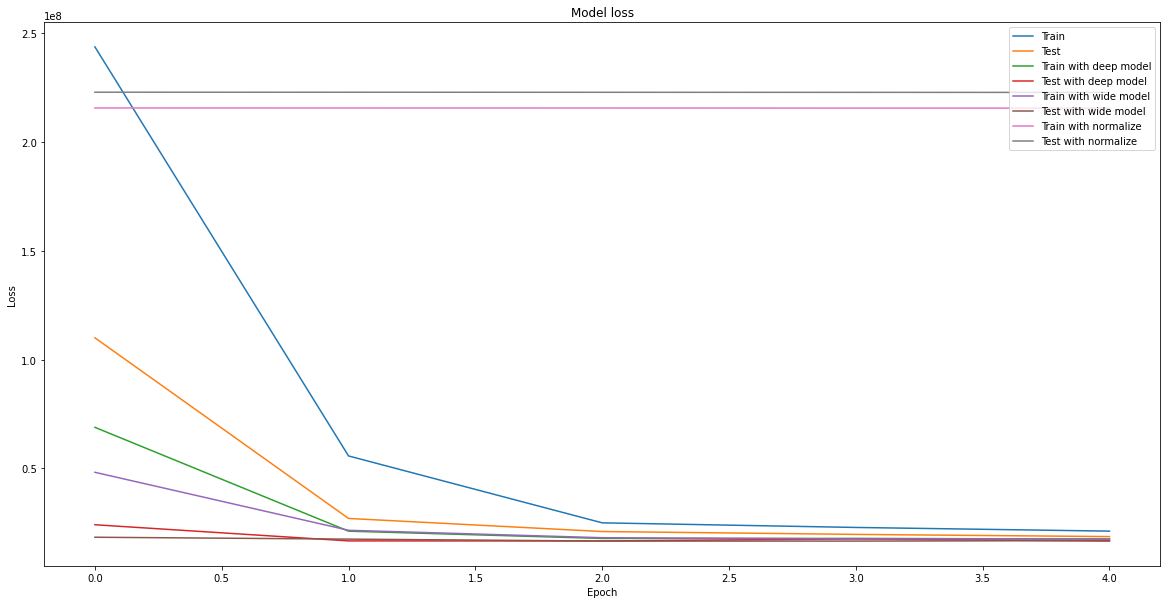

In [5]:
plt.figure(figsize=(20,10))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# plot training results
plt.plot(training_history_price_model.history['loss'])
plt.plot(training_history_price_model.history['val_loss'])

# plot deep model training results
plt.plot(training_history_deep_price_model.history['loss'])
plt.plot(training_history_deep_price_model.history['val_loss'])

# plot wide model training results
plt.plot(training_history_wide_price_model.history['loss'])
plt.plot(training_history_wide_price_model.history['val_loss'])

# plot normalize training results
plt.plot(training_history_norm_price_model.history['loss'])
plt.plot(training_history_norm_price_model.history['val_loss'])

plt.legend(['Train','Test',
            'Train with deep model', 'Test with deep model',
            'Train with wide model', 'Test with wide model',
            'Train with normalize', 'Test with normalize'], loc='upper right')
plt.show()
